### Importing modules and data

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras import optimizers
from keras.utils import np_utils

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Bigger figures

import time

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


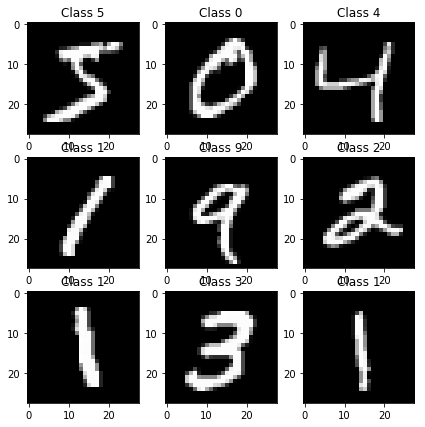

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

### Preprocessing

In [4]:
X_train = X_train.reshape(60000, 784) # 784 = 28 X 28,  Flattening out the image into single vector
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255  # normalising image
X_test /= 255

n = 10 # number of classes

# convert labels to onehot
y_train = np_utils.to_categorical(y_train, n)
y_test = np_utils.to_categorical(y_test, n)

### Plotting Utilities

In [5]:
def plot_losses_acc(history):    
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## Models

### 3 layered FC

In [5]:
# Architecture
model = Sequential()
model.add(Dense(512, input_dim=784)) # first layer with 512 units
model.add(Activation('relu')) # relu activation
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Defining loss and optimizer with defaults and also the metrics
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [6]:
since = time.time() # calculating before time

history = model.fit(X_train, y_train,
          batch_size=128, epochs=4,verbose=1,
          validation_data=(X_test, y_test))

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 25s 412us/step - loss: 0.2185 - acc: 0.9338 - val_loss: 0.0994 - val_acc: 0.9694
Epoch 2/4
60000/60000 [==============================] - 26s 429us/step - loss: 0.0798 - acc: 0.9756 - val_loss: 0.0811 - val_acc: 0.9742
Epoch 3/4
60000/60000 [==============================] - 22s 369us/step - loss: 0.0508 - acc: 0.9841 - val_loss: 0.0752 - val_acc: 0.9766
Epoch 4/4
60000/60000 [==============================] - 23s 388us/step - loss: 0.0351 - acc: 0.9886 - val_loss: 0.0792 - val_acc: 0.9759
Training complete in 1m 36s


** Validation accuracy after 4th epoch is 97.59%. Let's train it for 2 more epochs**

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


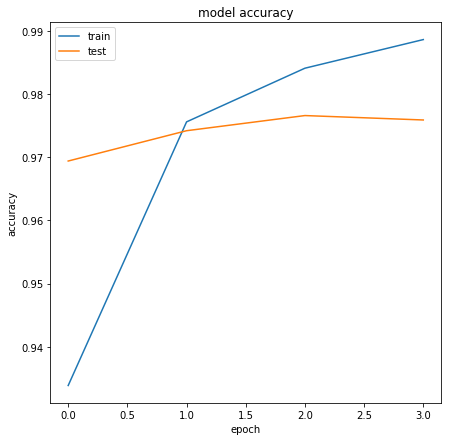

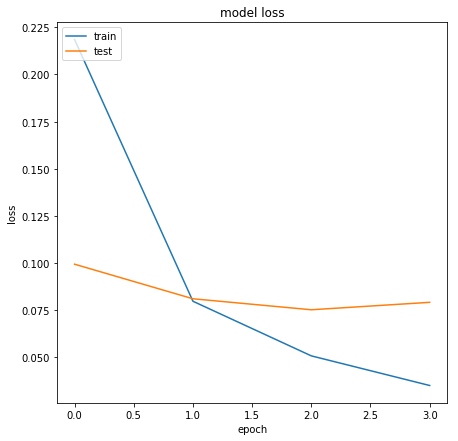

In [8]:
plot_losses_acc(history)

In [81]:
model.fit(X_train, y_train,
          batch_size=128, epochs=2,verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 27s 443us/step - loss: 0.0279 - acc: 0.9909 - val_loss: 0.0799 - val_acc: 0.9762
Epoch 2/2
60000/60000 [==============================] - 25s 413us/step - loss: 0.0259 - acc: 0.9913 - val_loss: 0.0762 - val_acc: 0.9780


**seems like model is overfitting a bit. ** 

train loss = 0.02
val loss = 0.07 ** overfitting **

### Let's Add some dropout in the same model above

In [10]:
model = Sequential()
model.add(Dense(512, input_dim=784)) # first layer with 512 units
model.add(Activation('relu')) # relu activation
model.add(Dropout(0.2)) # Randomly drop 20% of the activations
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2)) # Randomly drop 20% of the activations
model.add(Dense(10))
model.add(Activation('softmax'))

# Defining loss and optimizer with defaults and also the metrics
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [11]:
since = time.time() # calculating before time

history = model.fit(X_train, y_train,
          batch_size=128, epochs=4,verbose=1,
          validation_data=(X_test, y_test))

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 28s 463us/step - loss: 0.2491 - acc: 0.9256 - val_loss: 0.1114 - val_acc: 0.9625
Epoch 2/4
60000/60000 [==============================] - 29s 476us/step - loss: 0.1036 - acc: 0.9682 - val_loss: 0.0812 - val_acc: 0.9741
Epoch 3/4
60000/60000 [==============================] - 26s 425us/step - loss: 0.0738 - acc: 0.9765 - val_loss: 0.0684 - val_acc: 0.9773
Epoch 4/4
60000/60000 [==============================] - 26s 441us/step - loss: 0.0558 - acc: 0.9820 - val_loss: 0.0686 - val_acc: 0.9783
Training complete in 1m 49s


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


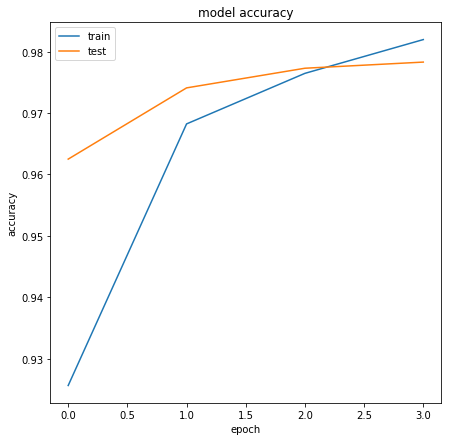

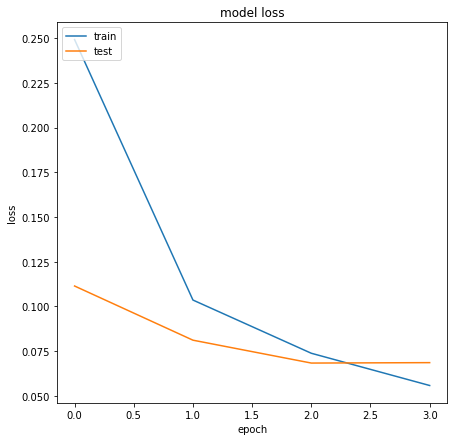

In [13]:
plot_losses_acc(history)

** Dropout didn't increase accuracy but it surely decreased the validation loss. We can play with dropout rate more. **

### Above model with batch normalisation

In [ ]:
model = Sequential()
model.add(Dense(512,input_dim=784)) # first layer with 512 units
model.add(BatchNormalization()) # batch normalisation layer
model.add(Activation('relu')) # relu activation
model.add(Dropout(0.5)) # Randomly drop 20% of the activations
model.add(Dense(512))
model.add(BatchNormalization()) # batch normalisation layer
model.add(Activation('relu'))
model.add(Dropout(0.5)) # Randomly drop 20% of the activations
model.add(Dense(10))
model.add(Activation('softmax'))

# Defining loss and optimizer with defaults and also the metrics
model.compile(loss=loss, optimizer=optimizer,metrics=['accuracy'])

In [20]:
since = time.time() # calculating before time

history = model.fit(X_train, y_train,
          batch_size=128, epochs=7,verbose=1,
          validation_data=(X_test, y_test))

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 30s 506us/step - loss: 0.3463 - acc: 0.8919 - val_loss: 0.1214 - val_acc: 0.9617
Epoch 2/7
60000/60000 [==============================] - 27s 458us/step - loss: 0.1794 - acc: 0.9455 - val_loss: 0.0943 - val_acc: 0.9704
Epoch 3/7
60000/60000 [==============================] - 25s 416us/step - loss: 0.1395 - acc: 0.9568 - val_loss: 0.0850 - val_acc: 0.9728
Epoch 4/7
60000/60000 [==============================] - 28s 459us/step - loss: 0.1187 - acc: 0.9634 - val_loss: 0.0779 - val_acc: 0.9764
Epoch 5/7
60000/60000 [==============================] - 33s 553us/step - loss: 0.1055 - acc: 0.9665 - val_loss: 0.0694 - val_acc: 0.9784
Epoch 6/7
60000/60000 [==============================] - 33s 553us/step - loss: 0.0953 - acc: 0.9697 - val_loss: 0.0632 - val_acc: 0.9802
Epoch 7/7
60000/60000 [==============================] - 31s 519us/step - loss: 0.0874 - acc: 0.9720 - val_loss: 0.0612 - 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


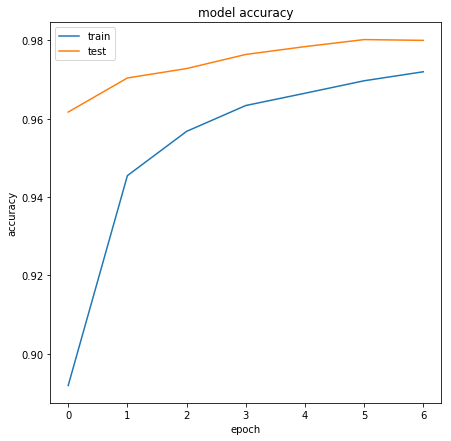

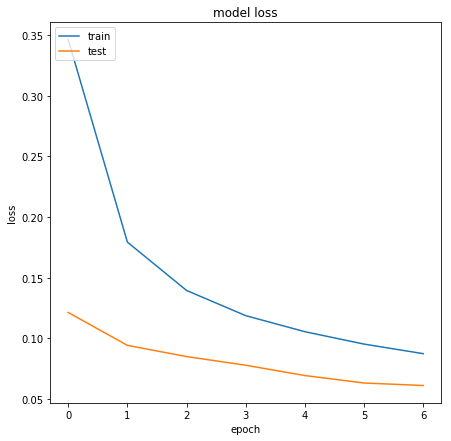

In [22]:
plot_losses_acc(history)

### ConvNet 

In [60]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(1, 28, 28), activation='relu',padding='same',data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2, 2),data_format='channels_first'))
model.add(Conv2D(64, (5,5),activation='relu',padding='same',data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
model.add(Flatten())
model.add(Dense(49, activation='relu'))
model.add(Dense(n, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [54]:
X_train = X_train.reshape(-1,1,28,28)
X_test = X_test.reshape(-1,1,28,28)

In [61]:
since = time.time() # calculating before time

history = model.fit(X_train, y_train,
          batch_size=512, epochs=7,verbose=1,
          validation_data=(X_test, y_test))

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 181s 3ms/step - loss: 0.4524 - acc: 0.8754 - val_loss: 0.1271 - val_acc: 0.9575
Epoch 2/7
60000/60000 [==============================] - 180s 3ms/step - loss: 0.1003 - acc: 0.9697 - val_loss: 0.0699 - val_acc: 0.9768
Epoch 3/7
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0650 - acc: 0.9803 - val_loss: 0.0604 - val_acc: 0.9799
Epoch 4/7
60000/60000 [==============================] - 181s 3ms/step - loss: 0.0511 - acc: 0.9845 - val_loss: 0.0441 - val_acc: 0.9859
Epoch 5/7
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0413 - acc: 0.9873 - val_loss: 0.0376 - val_acc: 0.9880
Epoch 6/7
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0364 - acc: 0.9890 - val_loss: 0.0361 - val_acc: 0.9881
Epoch 7/7
60000/60000 [==============================] - 182s 3ms/step - loss: 0.0311 - acc: 0.9906 - val_loss: 0.0327 - val_acc

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


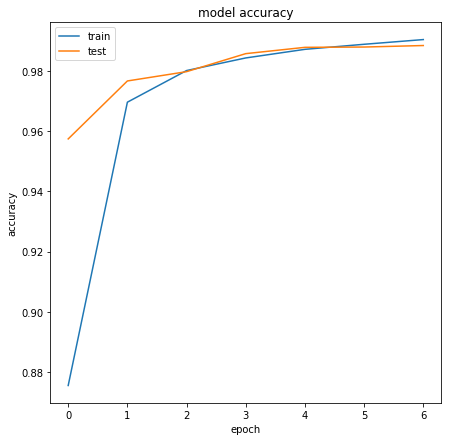

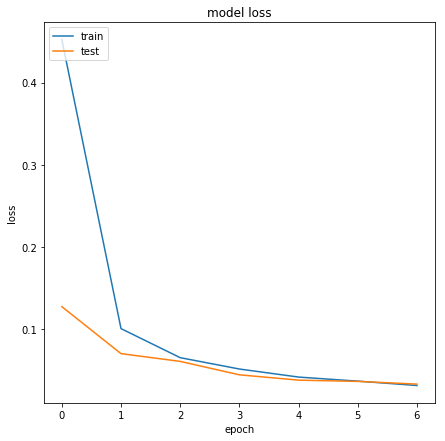

In [62]:
plot_losses_acc(history)

## 5L MLP

In [5]:
# Architecture
model = Sequential()
model.add(Dense(512, input_dim=784)) # first layer with 512 units
model.add(Activation('relu')) # relu activation
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Defining loss and optimizer with defaults and also the metrics
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [7]:
since = time.time() # calculating before time

history = model.fit(X_train, y_train,
          batch_size=512, epochs=200,verbose=1,
          validation_data=(X_test, y_test))

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 12s 206us/step - loss: 0.0166 - acc: 0.9947 - val_loss: 0.0759 - val_acc: 0.9782
Epoch 2/200
60000/60000 [==============================] - 13s 223us/step - loss: 0.0213 - acc: 0.9925 - val_loss: 0.0843 - val_acc: 0.9775
Epoch 3/200
60000/60000 [==============================] - 13s 216us/step - loss: 0.0091 - acc: 0.9972 - val_loss: 0.0861 - val_acc: 0.9808
Epoch 4/200
60000/60000 [==============================] - 12s 205us/step - loss: 0.0193 - acc: 0.9939 - val_loss: 0.0844 - val_acc: 0.9791
Epoch 5/200
60000/60000 [==============================] - 13s 219us/step - loss: 0.0109 - acc: 0.9964 - val_loss: 0.0900 - val_acc: 0.9797
Epoch 6/200
60000/60000 [==============================] - 13s 210us/step - loss: 0.0065 - acc: 0.9977 - val_loss: 0.0976 - val_acc: 0.9782
Epoch 7/200
60000/60000 [==============================] - 12s 205us/step - loss: 0.0101 - acc: 0.9967 - val_l

Epoch 59/200
60000/60000 [==============================] - 12s 207us/step - loss: 0.0036 - acc: 0.9992 - val_loss: 0.0942 - val_acc: 0.9845
Epoch 60/200
60000/60000 [==============================] - 12s 206us/step - loss: 0.0048 - acc: 0.9987 - val_loss: 0.0904 - val_acc: 0.9833
Epoch 61/200
60000/60000 [==============================] - 13s 215us/step - loss: 0.0017 - acc: 0.9994 - val_loss: 0.0902 - val_acc: 0.9857
Epoch 62/200
60000/60000 [==============================] - 13s 215us/step - loss: 0.0039 - acc: 0.9989 - val_loss: 0.0990 - val_acc: 0.9832
Epoch 63/200
60000/60000 [==============================] - 13s 213us/step - loss: 6.7046e-04 - acc: 0.9998 - val_loss: 0.1098 - val_acc: 0.9835
Epoch 64/200
60000/60000 [==============================] - 12s 201us/step - loss: 0.0064 - acc: 0.9984 - val_loss: 0.1055 - val_acc: 0.9818
Epoch 65/200
60000/60000 [==============================] - 13s 218us/step - loss: 0.0062 - acc: 0.9985 - val_loss: 0.1002 - val_acc: 0.9834
Epoch 66/

60000/60000 [==============================] - 12s 201us/step - loss: 1.3392e-07 - acc: 1.0000 - val_loss: 0.1343 - val_acc: 0.9859
Epoch 173/200
60000/60000 [==============================] - 12s 204us/step - loss: 1.3292e-07 - acc: 1.0000 - val_loss: 0.1345 - val_acc: 0.9859
Epoch 174/200
60000/60000 [==============================] - 13s 212us/step - loss: 1.3201e-07 - acc: 1.0000 - val_loss: 0.1348 - val_acc: 0.9859
Epoch 175/200
60000/60000 [==============================] - 12s 207us/step - loss: 1.3118e-07 - acc: 1.0000 - val_loss: 0.1350 - val_acc: 0.9859
Epoch 176/200
60000/60000 [==============================] - 13s 212us/step - loss: 1.3042e-07 - acc: 1.0000 - val_loss: 0.1353 - val_acc: 0.9859
Epoch 177/200
60000/60000 [==============================] - 13s 214us/step - loss: 1.2971e-07 - acc: 1.0000 - val_loss: 0.1355 - val_acc: 0.9859
Epoch 178/200
60000/60000 [==============================] - 12s 199us/step - loss: 1.2904e-07 - acc: 1.0000 - val_loss: 0.1358 - val_acc:

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


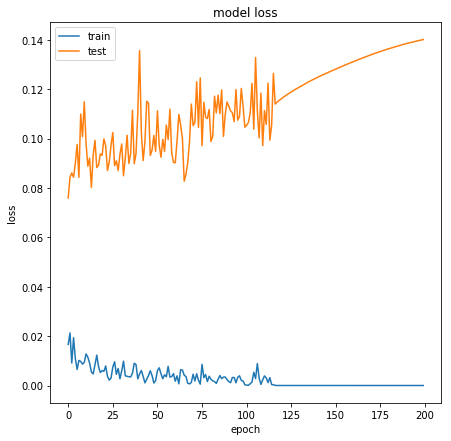

In [8]:
plot_losses_acc(history)

### Above model with Dropout

In [9]:
# Architecture
model = Sequential()
model.add(Dense(512, input_dim=784)) # first layer with 512 units
model.add(Activation('relu')) # relu activation
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# Defining loss and optimizer with defaults and also the metrics
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [10]:
since = time.time() # calculating before time

history = model.fit(X_train, y_train,
          batch_size=512, epochs=200,verbose=1,
          validation_data=(X_test, y_test))

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 17s 292us/step - loss: 0.7172 - acc: 0.7622 - val_loss: 0.1868 - val_acc: 0.9445
Epoch 2/200
60000/60000 [==============================] - 16s 268us/step - loss: 0.2402 - acc: 0.9290 - val_loss: 0.1232 - val_acc: 0.9629
Epoch 3/200
60000/60000 [==============================] - 16s 264us/step - loss: 0.1803 - acc: 0.9473 - val_loss: 0.1063 - val_acc: 0.9700
Epoch 4/200
60000/60000 [==============================] - 16s 267us/step - loss: 0.1503 - acc: 0.9565 - val_loss: 0.0922 - val_acc: 0.9741
Epoch 5/200
60000/60000 [==============================] - 17s 283us/step - loss: 0.1319 - acc: 0.9620 - val_loss: 0.0885 - val_acc: 0.9743
Epoch 6/200
60000/60000 [==============================] - 16s 261us/step - loss: 0.1206 - acc: 0.9649 - val_loss: 0.0754 - val_acc: 0.9785
Epoch 7/200
60000/60000 [==============================] - 16s 267us/step - loss: 0.1051 - acc: 0.9691 - val_l

Epoch 59/200
60000/60000 [==============================] - 16s 269us/step - loss: 0.0281 - acc: 0.9917 - val_loss: 0.0742 - val_acc: 0.9836
Epoch 60/200
60000/60000 [==============================] - 17s 280us/step - loss: 0.0257 - acc: 0.9927 - val_loss: 0.0687 - val_acc: 0.9851
Epoch 61/200
60000/60000 [==============================] - 16s 272us/step - loss: 0.0288 - acc: 0.9914 - val_loss: 0.0689 - val_acc: 0.9859
Epoch 62/200
60000/60000 [==============================] - 17s 286us/step - loss: 0.0287 - acc: 0.9916 - val_loss: 0.0663 - val_acc: 0.9860
Epoch 63/200
60000/60000 [==============================] - 16s 274us/step - loss: 0.0296 - acc: 0.9911 - val_loss: 0.0651 - val_acc: 0.9847
Epoch 64/200
60000/60000 [==============================] - 16s 265us/step - loss: 0.0283 - acc: 0.9915 - val_loss: 0.0626 - val_acc: 0.9861
Epoch 65/200
60000/60000 [==============================] - 16s 264us/step - loss: 0.0263 - acc: 0.9919 - val_loss: 0.0635 - val_acc: 0.9862
Epoch 66/200


Epoch 117/200
60000/60000 [==============================] - 16s 266us/step - loss: 0.0214 - acc: 0.9939 - val_loss: 0.0694 - val_acc: 0.9866
Epoch 118/200
60000/60000 [==============================] - 16s 267us/step - loss: 0.0205 - acc: 0.9941 - val_loss: 0.0677 - val_acc: 0.9868
Epoch 119/200
60000/60000 [==============================] - 16s 266us/step - loss: 0.0194 - acc: 0.9948 - val_loss: 0.0748 - val_acc: 0.9863
Epoch 120/200
60000/60000 [==============================] - 17s 276us/step - loss: 0.0213 - acc: 0.9945 - val_loss: 0.0672 - val_acc: 0.9866
Epoch 121/200
60000/60000 [==============================] - 16s 261us/step - loss: 0.0194 - acc: 0.9948 - val_loss: 0.0749 - val_acc: 0.9855
Epoch 122/200
60000/60000 [==============================] - 17s 289us/step - loss: 0.0203 - acc: 0.9944 - val_loss: 0.0666 - val_acc: 0.9872
Epoch 123/200
60000/60000 [==============================] - 16s 271us/step - loss: 0.0181 - acc: 0.9947 - val_loss: 0.0711 - val_acc: 0.9871
Epoch 

Epoch 175/200
60000/60000 [==============================] - 15s 251us/step - loss: 0.0186 - acc: 0.9950 - val_loss: 0.0799 - val_acc: 0.9860
Epoch 176/200
60000/60000 [==============================] - 17s 285us/step - loss: 0.0159 - acc: 0.9956 - val_loss: 0.0770 - val_acc: 0.9864
Epoch 177/200
60000/60000 [==============================] - 16s 261us/step - loss: 0.0174 - acc: 0.9956 - val_loss: 0.0797 - val_acc: 0.9857
Epoch 178/200
60000/60000 [==============================] - 16s 269us/step - loss: 0.0157 - acc: 0.9960 - val_loss: 0.0807 - val_acc: 0.9865
Epoch 179/200
60000/60000 [==============================] - 16s 269us/step - loss: 0.0171 - acc: 0.9959 - val_loss: 0.0870 - val_acc: 0.9865
Epoch 180/200
60000/60000 [==============================] - 16s 275us/step - loss: 0.0169 - acc: 0.9950 - val_loss: 0.0745 - val_acc: 0.9868
Epoch 181/200
60000/60000 [==============================] - 17s 278us/step - loss: 0.0177 - acc: 0.9954 - val_loss: 0.0757 - val_acc: 0.9857
Epoch 

In [ ]:
plot_losses_acc(history)

### CNNs

In [6]:
X_train = X_train.reshape(-1,1,28,28)
X_test = X_test.reshape(-1,1,28,28)

In [7]:
optimizer = 'adam'
loss = 'categorical_crossentropy'

In [20]:
model = Sequential(name='CNN7')
model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu',padding='same',data_format='channels_first'))
model.add(BatchNormalization(axis=1))
model.add(Conv2D(32, (3,3),activation='relu',padding='same',data_format='channels_first'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2),data_format='channels_first'))
model.add(Conv2D(64, (3,3),activation='relu',padding='same',data_format='channels_first'))
model.add(BatchNormalization(axis=1))
model.add(Conv2D(64, (3,3),activation='relu',padding='same',data_format='channels_first'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
model.add(Conv2D(128, (3,3),activation='relu',padding='same',data_format='channels_first'))
model.add(BatchNormalization(axis=1))
model.add(Conv2D(128, (3,3),activation='relu',padding='same',data_format='channels_first'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
model.add(Conv2D(256, (3,3),activation='relu',padding='same',data_format='channels_first'))
model.add(BatchNormalization(axis=1))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))
model.add(Dense(n, activation='softmax'))
# Compile model
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [21]:
model.name

'CNN7'

In [ ]:
since = time.time() # calculating before time

history = model.fit(X_train, y_train,
          batch_size=256, epochs=3,verbose=1,
          validation_data=(X_test, y_test))

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
39168/60000 [==================>...........] - ETA: 5:54 - loss: 0.1359 - acc: 0.9579

KeyboardInterrupt: 

In [ ]:
plot_losses_acc(history)

### MLP 4,5

In [13]:
model = Sequential(name='MLP5')
model.add(Flatten(input_shape=(1,28,28)))
model.add(Dense(512)) # first layer with 512 units
model.add(Activation('relu')) # relu activation
model.add(Dropout(0.5)) # Randomly drop 20% of the activations
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5)) # Randomly drop 20% of the activations
model.add(Dense(10))
model.add(Activation('softmax'))

# Defining loss and optimizer with defaults and also the metrics
model.compile(loss=loss, optimizer=optimizer,metrics=['accuracy'])

In [14]:
since = time.time() # calculating before time

history = model.fit(X_train, y_train,
          batch_size=256, epochs=3,verbose=1,
          validation_data=(X_test, y_test))

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 21s 342us/step - loss: 0.4032 - acc: 0.8749 - val_loss: 0.1370 - val_acc: 0.9584
Epoch 2/3
60000/60000 [==============================] - 18s 295us/step - loss: 0.1716 - acc: 0.9488 - val_loss: 0.1093 - val_acc: 0.9698
Epoch 3/3
60000/60000 [==============================] - 20s 325us/step - loss: 0.1308 - acc: 0.9610 - val_loss: 0.0877 - val_acc: 0.9733
Training complete in 0m 58s


In [15]:
model = Sequential()
model.add(Flatten(input_shape=(1,28,28)))
model.add(Dense(512)) # first layer with 512 units
model.add(BatchNormalization()) # batch normalisation layer
model.add(Activation('relu')) # relu activation
model.add(Dropout(0.2)) # Randomly drop 20% of the activations
model.add(Dense(512))
model.add(BatchNormalization()) # batch normalisation layer
model.add(Activation('relu'))
model.add(Dropout(0.2)) # Randomly drop 20% of the activations
model.add(Dense(10))
model.add(Activation('softmax'))
# Defining loss and optimizer with defaults and also the metrics
model.compile(loss=loss, optimizer=optimizer,metrics=['accuracy'])

In [16]:
since = time.time() # calculating before time

history = model.fit(X_train, y_train,
          batch_size=256, epochs=3,verbose=1,
          validation_data=(X_test, y_test))

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 27s 448us/step - loss: 0.2319 - acc: 0.9300 - val_loss: 0.1107 - val_acc: 0.9654
Epoch 2/3
60000/60000 [==============================] - 25s 424us/step - loss: 0.0989 - acc: 0.9700 - val_loss: 0.0800 - val_acc: 0.9742
Epoch 3/3
60000/60000 [==============================] - 25s 421us/step - loss: 0.0698 - acc: 0.9780 - val_loss: 0.0670 - val_acc: 0.9791
Training complete in 1m 18s
